<a href="https://colab.research.google.com/github/alfinmaulani/skripsi/blob/master/3.2pretrained_ekstraksi_dan_klasifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade scikit-learn
import numpy as np
import pandas as pd
import io
import os
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
import gensim
import ast

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


load korpus

In [47]:
korpus1 = '/content/drive/MyDrive/korpus1dataisear(preputama).csv'
korpus2 = '/content/drive/MyDrive/korpus2(preputama).csv'
df = pd.read_csv(korpus2)

In [3]:
temp=[]
for senten in df.dokumen:
  temp.append(ast.literal_eval(senten))
df.dokumen=temp

In [48]:
temp=[]
for senten in df.content:
  temp.append(ast.literal_eval(senten))
df.content=temp

load model pretrained

In [5]:
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.test.utils import get_tmpfile

In [6]:
pretrained1='/content/drive/MyDrive/pretrained_w2v-enwiki.skip.size100.win10.neg15.sample1e-5.min15.txt'
pretrained2='/content/drive/MyDrive/pretrained_glove-glove.6B.100d.txt'
pretrained3='/content/drive/MyDrive/pretrained_glove-glove.twitter.27B.100d.txt'

In [ ]:
# model=gensim.models.word2vec.Word2Vec.load(w2vlain)

In [ ]:
# premodel = KeyedVectors.load_word2vec_format(w2vlain, binary=True,encoding='utf-8')

In [49]:
model = KeyedVectors.load_word2vec_format(pretrained1, binary=False)

In [57]:
tmp_file = get_tmpfile("wv.txt")
glove2word2vec(pretrained2, tmp_file)
model = KeyedVectors.load_word2vec_format(tmp_file)

In [62]:
tmp_file = get_tmpfile("wv.txt")
glove2word2vec(pretrained3, tmp_file)
model = KeyedVectors.load_word2vec_format(tmp_file)

In [50]:
model.wv.vectors.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


(400000, 100)

In [ ]:
model.wv.most_similar('yes')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


[('yeah', 0.9272385835647583),
 ('well', 0.8756011724472046),
 ('oh', 0.8615125417709351),
 ('yep', 0.8467155694961548),
 ('maybe', 0.8338871598243713),
 ('what', 0.830864667892456),
 ('yup', 0.8280388116836548),
 ('know', 0.8270984888076782),
 ('yess', 0.8268904685974121),
 ('sure', 0.8254950046539307)]

In [51]:
pakai_model=3

average base ekstraksi fitur

In [63]:
import array
ekstrak=[]
dim1=100
dim3=300
temp=array.array('i',(0,)*dim1)
hitungpre=0
hitungbiasa=0

if pakai_model == 1:
  for senten in df.dokumen:
    jumlah_dipakai=0
    for word in senten:
      try:
        temp=np.add(temp,model.wv[word])
        jumlah_dipakai+=1
        hitungpre+=1
      except:
        temp=np.add(temp,np.zeros((100)))
        hitungbiasa+=1
    if jumlah_dipakai!=0:
      temp=temp/jumlah_dipakai
    ekstrak.append(temp)

elif pakai_model == 2:
  for senten in df.dokumen:
    for word in senten:
      try:
        temp=np.add(temp,premodel.wv[word])
        hitungpre+=1
      except:
        temp=np.add(temp,model.word_vectors[model.dictionary[word]])
        hitungbiasa+=1
    temp=temp/len(senten)
    ekstrak.append(temp)

if pakai_model == 3:
  for senten in df.content:
    jumlah_dipakai=0
    for word in senten:
      try:
        temp=np.add(temp,model.wv[word])
        jumlah_dipakai+=1
        hitungpre+=1
      except:
        temp=np.add(temp,np.zeros((100)))
        hitungbiasa+=1
    if jumlah_dipakai!=0:
      temp=temp/jumlah_dipakai
    ekstrak.append(temp)

has_vec=ekstrak

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


In [64]:
print(hitungpre)
print(hitungbiasa)
print(hitungpre+hitungbiasa)

115260
2850
118110


In [65]:
X=has_vec
y=df.sentiment
print(np.shape(X))
print(np.shape(y))
# print(X)
# print(y)

(9279, 100)
(9279,)


klasifikasi svm

In [66]:
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score

In [67]:
def klasifikasi(y_pred):
  ConfusionMatrixDisplay.from_predictions(y, y_pred)
  plt.show()
  print(accuracy_score(y, y_pred))
  print(precision_recall_fscore_support(y, y_pred, average='macro'))

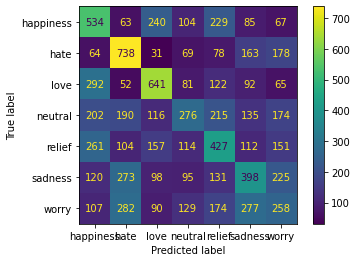

0.35262420519452525
(0.3446966951196715, 0.35216086055394247, 0.3450737028760715, None)


In [68]:
clf = svm.SVC(kernel='poly', decision_function_shape='ovr', C=17)
# acc10k=cross_val_score(clf, X, y, cv=10)
# np.mean(acc10k)
y_pred = cross_val_predict(clf, X, y, cv=10)
klasifikasi(y_pred)

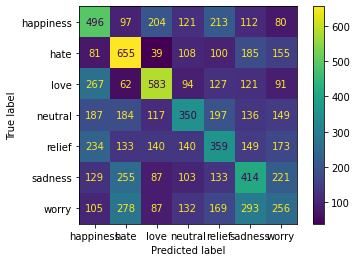

0.3346951940651543
(0.3314344522926846, 0.3344809583983398, 0.3310735004558455, None)


In [ ]:
clf = svm.SVC(kernel='rbf', decision_function_shape='ovr')
y_pred = cross_val_predict(clf, X, y, cv=10)
klasifikasi(y_pred)

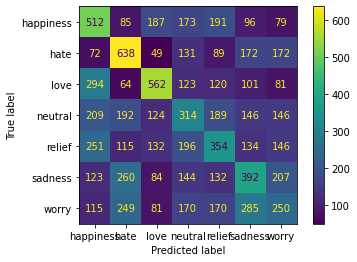

0.3249112998602301
(0.3208771873325237, 0.32471725475827695, 0.3213172510991284, None)


In [ ]:
clf = svm.SVC(kernel='linear', decision_function_shape='ovr')
y_pred = cross_val_predict(clf, X, y, cv=10)
klasifikasi(y_pred)